In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# If you have not installed Latex, the program will issue an error.
# In case the error occurs, just change True to False.
plt.rcParams['text.usetex'] = False
plt.rcParams['axes.labelpad'] = 20

In [84]:
x_train = np.array([0, 1, 2, 3, 4, 5, 20], dtype=np.float64)
X_train = x_train.reshape((-1, 1))
y_train = np.array([0, 0, 0, 1, 1, 1, 1], dtype=np.float64)

pos = (y_train == 1)
neg = (y_train == 0)

Text(0, 0.5, '$y$')

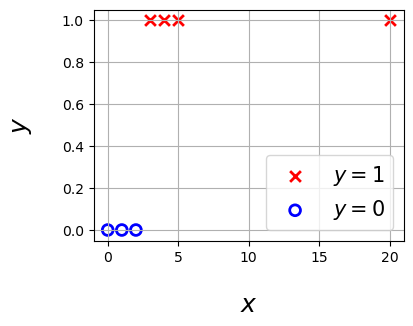

In [89]:
plt.figure(figsize=(4, 3))
plt.scatter(x_train[pos], y_train[pos], marker='x', color='r', label="$y = 1$", s=60, lw=2)
plt.scatter(x_train[neg], y_train[neg], marker='o', facecolor='none', label='$y = 0$', s=60, edgecolors='b', lw=2)
plt.legend(fontsize=15)
plt.grid(True)
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$y$', fontsize=18)

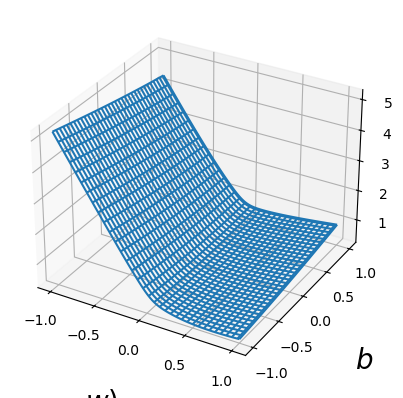

In [100]:
import sympy as sym

x, w, b = sym.symbols('x, w, b')
m = x_train.shape[0]
cost_sym = 0
for i in range(m):
    yhat = 1 / (1 + sym.exp(-(w * x_train[i] + b)))
    cost_sym -= (y_train[i] * sym.log(yhat) + (1 - y_train[i]) * sym.log(1 - yhat))
cost_sym = cost_sym/m
cost_func = sym.lambdify([w, b], cost_sym)
ww, bb = np.linspace(-1, 1, 101), np.linspace(-1, 1, 101)
ww, bb = np.meshgrid(ww, bb, indexing='ij')
cost_val = cost_func(ww, bb)

ax = plt.figure().add_subplot(projection='3d')
ax.plot_wireframe(ww, bb, cost_val)
ax.set_xlabel('$w)$', fontsize=20)
ax.set_ylabel('$b$', fontsize=20)
ax.set_zlabel('$J(w,b)$', fontsize=20)
plt.show()

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot_wireframe(ww, bb, cost_val)
ax.set_xlabel('$w)$', fontsize=20)
ax.set_ylabel('$b$', fontsize=20)
ax.set_zlabel('$J(w,b)$', fontsize=20)
plt.show()

In [86]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    f_wb = 1 / (1 + np.exp(-z))
    loss_on_examples = y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb)
    return -(np.sum(loss_on_examples) / m)

def compute_cost_grad(X_train, y_train, w, b):
    m = X_train.shape[0]
    z = np.dot(X_train, w) + b
    f_wb = 1 / (1 + np.exp(-z))
    err = f_wb - y_train
    dJ_dw = 1/m * np.dot(err, X_train)
    dJ_db = 1/m * np.sum(err)
    
    return dJ_dw, dJ_db

In [87]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.coef_, lr.intercept_

(array([[1.12061661]]), array([-2.80153704]))

C:\Users\ln69g\AppData\Local\Temp\ipykernel_8112\2166113728.py:5: RuntimeWarning: divide by zero encountered in log
  loss_on_examples = y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb)
C:\Users\ln69g\AppData\Local\Temp\ipykernel_8112\2166113728.py:5: RuntimeWarning: invalid value encountered in multiply
  loss_on_examples = y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb)


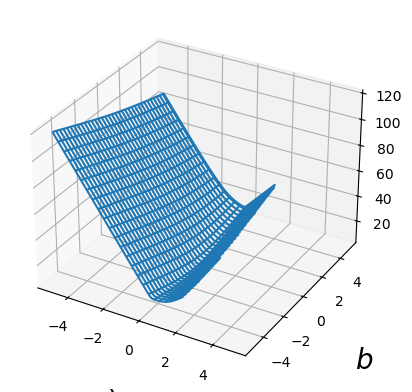

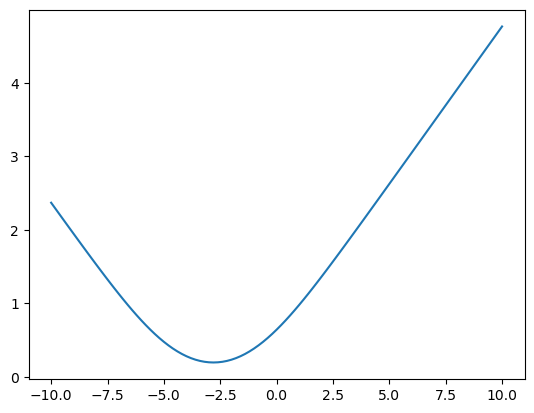

In [88]:
w = np.linspace(-5, 5, 101)
b = np.linspace(-5, 5, 101)
ww, bb = np.meshgrid(w, b, indexing='ij')
cost = np.zeros_like(ww)
for i in range(w.shape[0]):
    for j in range(b.shape[0]):
        cost[i,j] = compute_cost(X_train, y_train, ww[i,j], bb[i,j])

ax = plt.figure().add_subplot(projection='3d')
ax.plot_wireframe(ww, bb, cost)
ax.set_xlabel('$w)$', fontsize=20)
ax.set_ylabel('$b$', fontsize=20)
ax.set_zlabel('$J(w,b)$', fontsize=20)
plt.show()

ww = np.array([1.12])
bb = np.linspace(-10, 10, 101)
cost = np.zeros_like(bb)
for i in range(bb.shape[0]):
    cost[i] = compute_cost(X_train, y_train, ww, bb[i])

plt.plot(bb, cost)

In [52]:
delta = 1e-8
w0, b0 = np.array([0.5]), 0.1
w_pos, w_neg = w0 + delta, w0 - delta
J_pos = compute_cost(X_train, y_train, w_pos, b0)
J_neg = compute_cost(X_train, y_train, w_neg, b0)
dJ_dw_FD = (J_pos - J_neg) / (2 * delta)  # FD stands for finite difference
dJ_dw, dJ_db = compute_cost_grad(X_train, y_train, w0, b0)
print(f"Using analytical formula: {dJ_dw}")
print(f"Using finite difference : {dJ_dw_FD}")

b_pos, b_neg = b0 + delta, b0 - delta
J_pos = compute_cost(X_train, y_train, w0, b_pos)
J_neg = compute_cost(X_train, y_train, w0, b_neg)
dJ_db_fd = (J_pos - J_neg) / (2 * delta)
print(f"Using analytical formula: {dJ_db}")
print(f"Using finite difference : {dJ_db_fd}")

NameError: name 'compute_cost_grad' is not defined

In [ ]:
def gradient_descent(X_train, y_train, w_init, b_init, alpha, func_value, func_grad, TOL=1e-6, maxiters=1000):

    w = w_init
    b = b_init
    history = {'w': [], 'b': [], 'J': []}
    for step in range(maxiters):
        dJ_dw, dJ_db = func_grad(X_train, y_train, w, b)
        w = w - alpha * dJ_dw
        b = b - alpha * dJ_db

        history['w'].append(w)
        history['b'].append(b)
        history['J'].append(func_value(X_train, y_train, w, b))
        
        # if convergence, break the iteration
        if step > 1 and np.abs(history['J'][-1] - history['J'][-2]) / np.abs(history['J'][-1]) < TOL:
            print(f"Gradient descent converges at step {step}")
            print(f"Cost function = {history['J'][-1]}")
            break
        
    return w, b, history

C:\Users\ln69g\AppData\Local\Temp\ipykernel_20080\2755613096.py:8: RuntimeWarning: divide by zero encountered in log
  lost_on_examples = y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb)
C:\Users\ln69g\AppData\Local\Temp\ipykernel_20080\2755613096.py:8: RuntimeWarning: invalid value encountered in multiply
  lost_on_examples = y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb)


w_final = [13.80990706]
b_final = -34.35043754162859
[2.48737645]


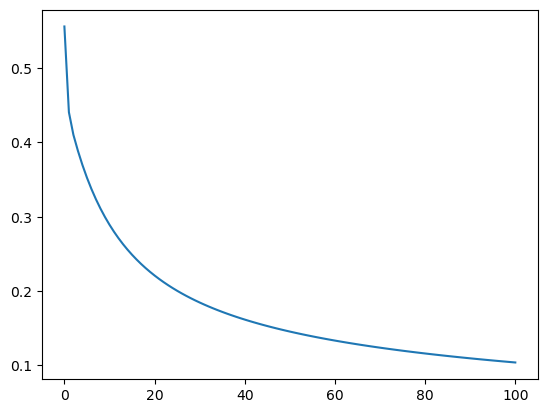

In [ ]:
w_final, b_final, history = gradient_descent(X_train, y_train, w_init=np.array([0.1]), b_init=0.1, \
                                    alpha=1.0, func_value=compute_cost_max_likelihood, \
                                    func_grad=compute_cost_grad, TOL=1e-6, maxiters=np.uint32(1e5))
print(f"w_final = {w_final}")
print(f"b_final = {b_final}")
print(-b_final/w_final)
plt.plot(history['J'])

In [ ]:
lr = LogisticRegression(penalty=None, solver='newton-cg')
lr.fit(X_train, y_train)
w_sk, b_sk = lr.coef_[0,0], lr.intercept_[0]
print(w_sk, b_sk)
print(-b_sk / w_sk)

18.774456651703073 -46.847913415022035
2.4953006248930434
